In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

<ipython-input-3-8e3919129fae>:10: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.engine.hyperparameters import HyperParameters


In [2]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.0 MB/s eta 0:00:00


In [5]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
df_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [6]:
df = pd.concat([df_test,df_train])

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.9,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1278 non-null   object 
 1   Open    1278 non-null   float64
 2   High    1278 non-null   float64
 3   Low     1278 non-null   float64
 4   Close   1278 non-null   object 
 5   Volume  1278 non-null   object 
dtypes: float64(3), object(3)
memory usage: 69.9+ KB


In [9]:
df.describe()

,Open,High,Low
count,1278.000000,1278.000000,1278.000000
mean,537.994906,542.168897,533.278803
std,154.508365,155.582501,153.174011
min,279.120000,281.210000,277.220000
25%,406.037500,408.230000,403.335000
50%,538.395000,542.330000,534.355000
75%,668.862500,677.705000,662.190000
max,837.810000,841.950000,827.010000


In [10]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [12]:
df    = df.loc[:,["Open"]].values
train = df[:len(df)-50]
test = df[len(train):]
# reshape
train = train.reshape(train.shape[0],1)

In [13]:
train.shape

(1228, 1)

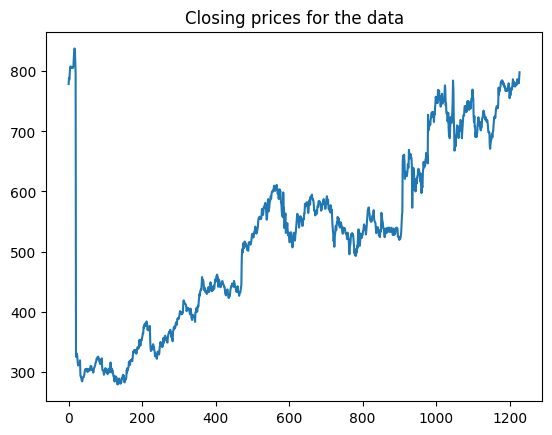

In [14]:
plt.plot(train);
plt.title("Closing prices for the data");

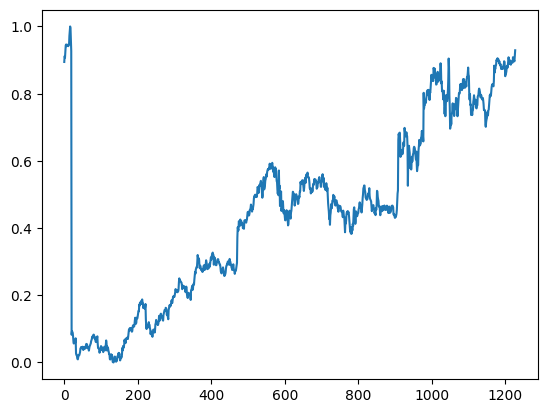

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1)) # defining of Scaler
train_scaled = scaler.fit_transform(train) # applying to Scaler to train

plt.plot(train_scaled)
plt.show()

In [16]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)


# Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Dimension of array is 3.

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout # it block to overfitting

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation.
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 7s 50ms/step - loss: 0.3953
Epoch 2/100
37/37 [==============================] - 3s 84ms/step - loss: 0.2526
Epoch 3/100
37/37 [==============================] - 2s 63ms/step - loss: 0.1867
Epoch 4/100
37/37 [==============================] - 2s 45ms/step - loss: 0.1362
Epoch 5/100
37/37 [==============================] - 2s 45ms/step - loss: 0.1075
Epoch 6/100
37/37 [==============================] - 2s 46ms/step - loss: 0.0858
Epoch 7/100
37/37 [==============================] - 2s 47ms/step - loss: 0.0685
Epoch 8/100
37/37 [==============================] - 2s 45ms/step - loss: 0.0587
Epoch 9/100
37/37 [==============================] - 2s 68ms/step - loss: 0.0518
Epoch 10/100
37/37 [==============================] - 3s 81ms/step - loss: 0.0435
Epoch 11/100
37/37 [==============================] - 2s 47ms/step - loss: 0.0377
Epoch 12/100
37/37 [==============================] - 2s 47ms/step - loss: 0.0332
Epoch 13/100
37/37 [=====

In [19]:
inputs = df[len(df) - len(test) - timesteps:]
inputs = scaler.transform(inputs)  # min max scaler

In [20]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0]) # 0 dan 50 ye, 1 den 51 e gibi kaydirarark 50 eleman aliyoruz
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
predicted_data = regressor.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

2/2 [==============================] - 1s 48ms/step


In [29]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test, predicted_data))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 12.489615467643292


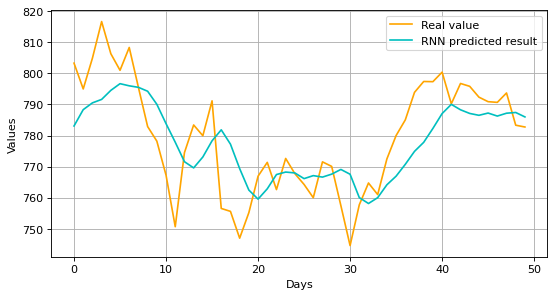

In [22]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="orange",label="Real value")
plt.plot(predicted_data,color="c",label="RNN predicted result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [24]:
model = Sequential()
model.add(LSTM(10, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='Adam')
model.fit(X_train,y_train,epochs=50, batch_size=1)

Epoch 1/50
1178/1178 [==============================] - 16s 11ms/step - loss: 0.0120
Epoch 2/50
1178/1178 [==============================] - 13s 11ms/step - loss: 0.0010
Epoch 3/50
1178/1178 [==============================] - 13s 11ms/step - loss: 8.3646e-04
Epoch 4/50
1178/1178 [==============================] - 13s 11ms/step - loss: 7.3662e-04
Epoch 5/50
1178/1178 [==============================] - 15s 13ms/step - loss: 6.3649e-04
Epoch 6/50
1178/1178 [==============================] - 12s 10ms/step - loss: 6.2275e-04
Epoch 7/50
1178/1178 [==============================] - 13s 11ms/step - loss: 5.7795e-04
Epoch 8/50
1178/1178 [==============================] - 14s 12ms/step - loss: 5.1631e-04
Epoch 9/50
1178/1178 [==============================] - 14s 12ms/step - loss: 5.0380e-04
Epoch 10/50
1178/1178 [==============================] - 13s 11ms/step - loss: 4.8140e-04
Epoch 11/50
1178/1178 [==============================] - 13s 11ms/step - loss: 4.0423e-04
Epoch 12/50
1178/1178 [====

In [25]:
predicted_data2=model.predict(X_test)
predicted_data2=scaler.inverse_transform(predicted_data2)

2/2 [==============================] - 1s 15ms/step


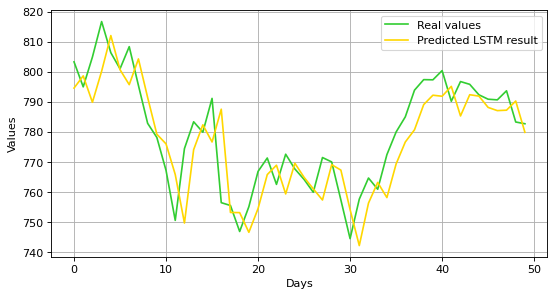

In [26]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="LimeGreen",label="Real values")
plt.plot(predicted_data2,color="Gold",label="Predicted LSTM result")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

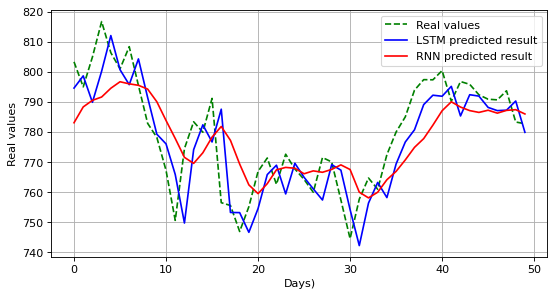

In [27]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test,color="green", linestyle='dashed',label="Real values")
plt.plot(predicted_data2,color="blue", label="LSTM predicted result")
plt.plot(predicted_data,color="red",label="RNN predicted result") # ben ekledim
plt.legend()
plt.xlabel("Days)")
plt.ylabel("Real values")
plt.grid(True)
plt.show()